In [16]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings 
warnings.filterwarnings('ignore')
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix
#Importing Logging
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)


In [17]:
url = 'https://raw.githubusercontent.com/meet-vasita/Telemarketing_Classification_Model/refs/heads/main/Dataset/BankData.csv'

df = pd.read_csv(url,sep=';')
df.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1091,50,blue-collar,married,primary,no,0,no,no,cellular,11,aug,72,5,-1,0,unknown,no
789,37,blue-collar,divorced,primary,no,511,yes,no,telephone,11,may,42,1,-1,0,unknown,no
1166,32,technician,single,tertiary,no,5514,no,no,cellular,22,apr,319,1,182,1,success,yes
2700,64,retired,divorced,tertiary,no,890,no,no,cellular,3,jul,531,3,-1,0,unknown,no
3469,48,blue-collar,married,primary,no,750,yes,no,cellular,18,may,90,6,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,48,entrepreneur,married,tertiary,no,810,no,no,unknown,6,jun,383,1,-1,0,unknown,no
2577,39,blue-collar,married,primary,no,2226,yes,no,unknown,6,may,158,1,-1,0,unknown,no
3640,34,blue-collar,married,primary,no,428,yes,no,cellular,18,may,59,2,-1,0,unknown,no
3578,53,technician,married,secondary,no,719,yes,no,unknown,14,may,230,1,-1,0,unknown,no


In [18]:
logging.info('Importing the dataset for model building')

In [19]:
df.shape

(4521, 17)

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [22]:
#Evaluate Descriptive Stats: EDA

#Step 1: Segregate Categorical Columns and Numerical Columns

categorical_num = df.select_dtypes(include=object)
numerical_num = df.select_dtypes(include=['int64','float64'])  

In [30]:
#Step2 : Evaluate Descriptive Stats

from collections import OrderedDict

stats = []

for i in numerical_num.columns:
    categorical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var()
    })
    stats.append(categorical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance
0,age,41.170095,39.0,34,33.0,49.0,16.0,10.576211,0.699501,0.348775,87,19,1.118562e+02
1,balance,1422.657819,444.0,0,69.0,1480.0,1411.0,3009.638142,6.596431,88.390332,71188,-3313,9.057922e+06
2,day,15.915284,16.0,20,9.0,21.0,12.0,8.247667,0.094627,-1.039531,31,1,6.802402e+01
3,duration,263.961292,185.0,123,104.0,329.0,225.0,259.856633,2.772420,12.530050,3025,4,6.752547e+04
4,campaign,2.793630,2.0,1,1.0,3.0,2.0,3.109807,4.743914,37.168920,50,1,9.670897e+00
5,pdays,39.766645,-1.0,-1,-1.0,-1.0,0.0,100.121124,2.717071,7.957128,871,-1,1.002424e+04
6,previous,0.542579,0.0,0,0.0,0.0,0.0,1.693562,5.875259,51.995212,25,0,2.868153e+00


In [ ]:
#Classification Problems uses Logistic Regression and it Always use Sigmoid Function
# if IQR is 0 then drop that columns 

<Axes: xlabel='month', ylabel='duration'>

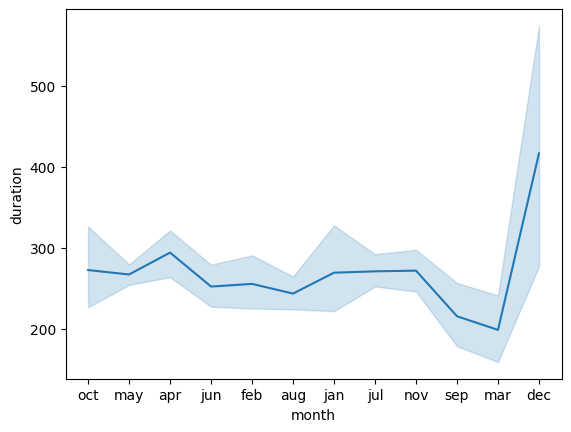

In [32]:
sns.lineplot(x=df['month'],y=df['duration'])